<a href="https://colab.research.google.com/github/IlyaSemenovGD/TensorFlow2_0_Udemy/blob/main/Udemy_TF2_Problem_9_CIFAR_10_Classification_Using_Deep_Learning_Questions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STEP #0: PROBLEM STATEMENT  

- CIFAR-10 is a dataset that consists of several images divided into the following 10 classes:
    - Airplanes
    - Cars
    - Birds
    - Cats
    - Deer
    - Dogs
    - Frogs
    - Horses
    - Ships
    - Trucks

- The dataset stands for the Canadian Institute For Advanced Research (CIFAR)
- CIFAR-10 is widely used for machine learning and computer vision applications.
- The dataset consists of 60,000 32x32 color images and 6,000 images of each class.
- Images have low resolution (32x32).
- Data Source: https://www.cs.toronto.edu/~kriz/cifar.html



# STEP #1: IMPORT LIBRARIES

In [1]:
import tensorflow as tf

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
tf.__version__

'2.17.1'

# STEP #2: LOAD DATASET

In [153]:
(X_train, y_train) , (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [154]:
X_train.shape

(50000, 32, 32, 3)

In [155]:
X_test.shape

(10000, 32, 32, 3)

In [156]:
y_train.shape

(50000, 1)

In [157]:
y_test.shape

(10000, 1)

# STEP #3: DATA VISUALIZATION

In [158]:
class_dict = {}
class_dict[0] = 'Airplanes'
class_dict[1] = 'Cars'
class_dict[2] = 'Birds'
class_dict[3] = 'Cats'
class_dict[4] = 'Deer'
class_dict[5] = 'Dogs'
class_dict[6] = 'Frogs'
class_dict[7] = 'Horses'
class_dict[8] = 'Ships'
class_dict[9] = 'Trucks'

Ships


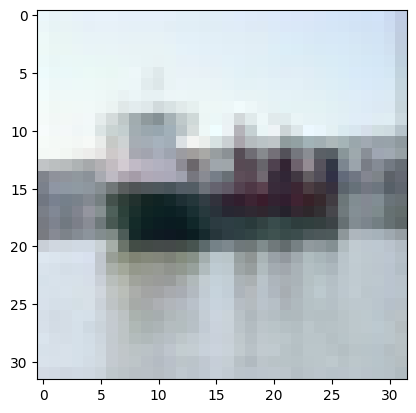

In [159]:
image_index = random.randint(0, X_train.shape[0])
plt.imshow(X_train[image_index])
print(class_dict[y_train[image_index][0]])

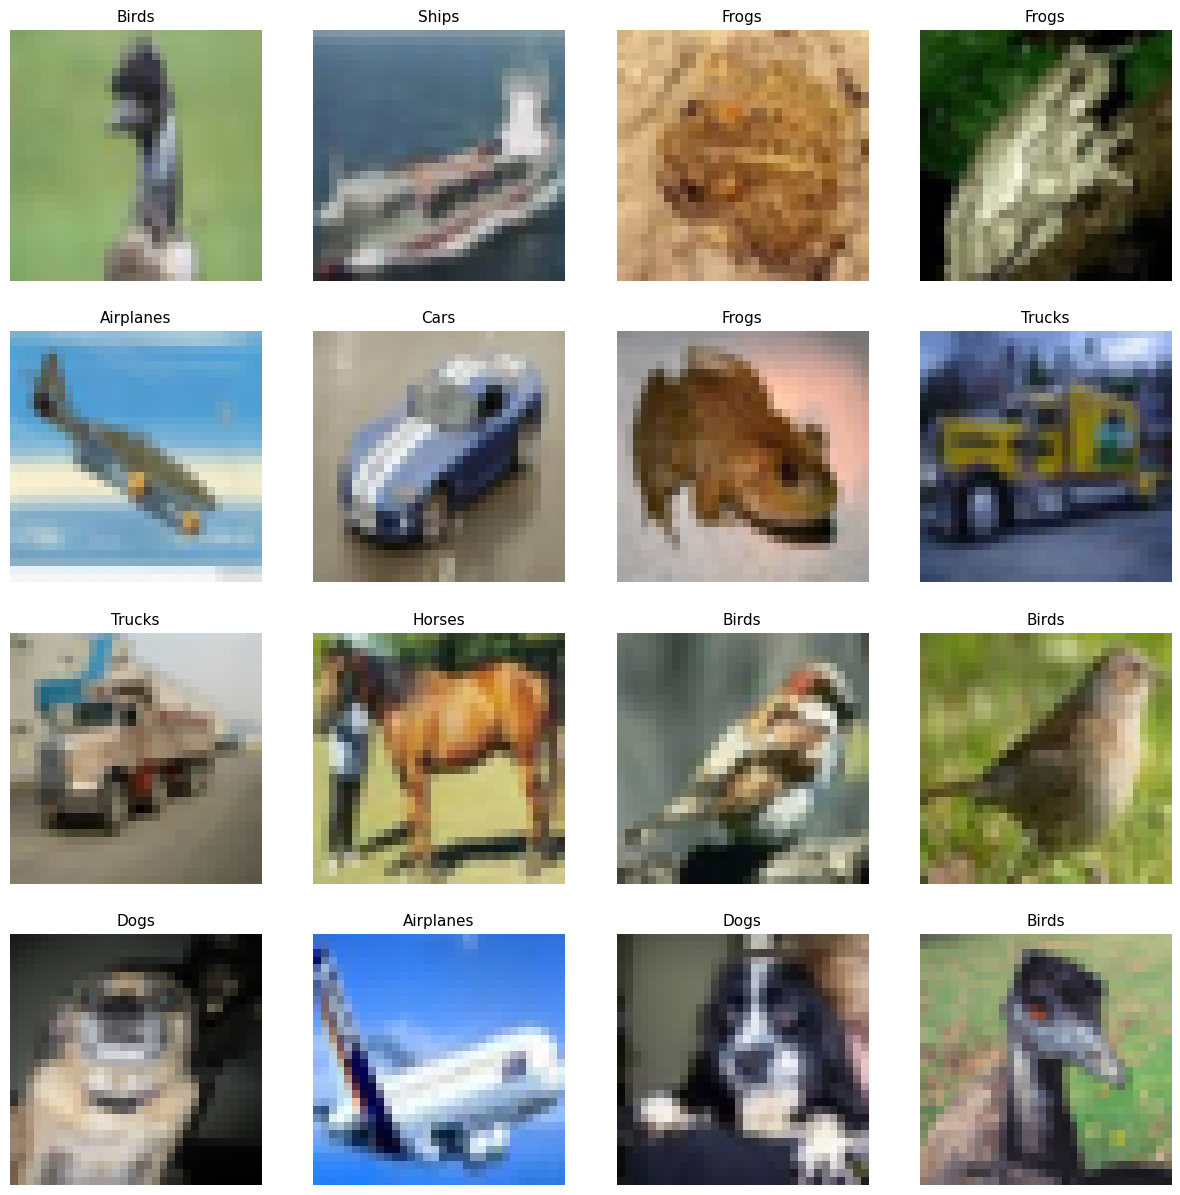

In [160]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid
W_grid = 4
L_grid = 4

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (15,15))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_training = X_train.shape[0] # get the length of the training dataset

for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables

    # Select a random number from 0 to n_training
    index = np.random.randint(0, n_training)
    # read and display an image with the selected index
    axes[i].imshow( X_train[index])
    axes[i].set_title(class_dict[y_train[index][0]], fontsize = 11)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.2)


In [161]:
len(X_train)

50000

# STEP#4: DATA PREPARATION

In [162]:
X_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [163]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [164]:
y_train.ravel()

array([2, 0, 9, ..., 1, 2, 7], dtype=uint8)

In [165]:
y_train = tf.one_hot(y_train.ravel(), 10, axis=-1).numpy()
y_train

array([[0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [166]:
y_test = tf.one_hot(y_test.ravel(), 10, axis=-1).numpy()
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [167]:
len(y_train)

50000

In [168]:
len(y_test)

10000

In [169]:
X_validation = X_train[:10000]
y_validation = y_train[:10000]
X_train = X_train[10000:]
y_train = y_train[10000:]

In [170]:
X_train.shape

(40000, 32, 32, 3)

In [171]:
X_train_norm = X_train.astype('float32') / 255
X_test_norm = X_test.astype('float32') / 255
X_validation_norm = X_validation.astype('float32') / 255

X_train_norm

array([[[[0.41960785, 0.4117647 , 0.14117648],
         [0.36078432, 0.36078432, 0.09803922],
         [0.3254902 , 0.34117648, 0.07843138],
         ...,
         [0.37254903, 0.36078432, 0.09411765],
         [0.3764706 , 0.3529412 , 0.09019608],
         [0.34509805, 0.33333334, 0.08235294]],

        [[0.37254903, 0.37254903, 0.10980392],
         [0.35686275, 0.36862746, 0.10196079],
         [0.3254902 , 0.34901962, 0.09019608],
         ...,
         [0.3529412 , 0.34901962, 0.09411765],
         [0.34117648, 0.32941177, 0.08627451],
         [0.3019608 , 0.29803923, 0.07450981]],

        [[0.3647059 , 0.37254903, 0.11372549],
         [0.3529412 , 0.36862746, 0.10980392],
         [0.3254902 , 0.3529412 , 0.12941177],
         ...,
         [0.3254902 , 0.3372549 , 0.08627451],
         [0.30980393, 0.30980393, 0.07450981],
         [0.26666668, 0.27450982, 0.06666667]],

        ...,

        [[0.27058825, 0.3764706 , 0.11372549],
         [0.22352941, 0.34509805, 0.06666667]

Birds


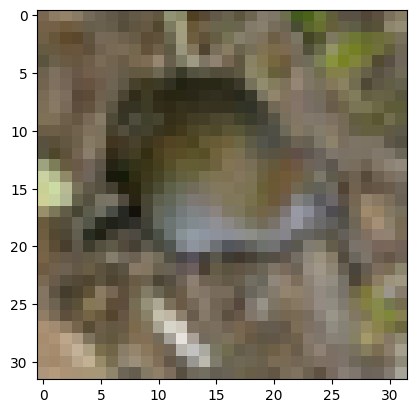

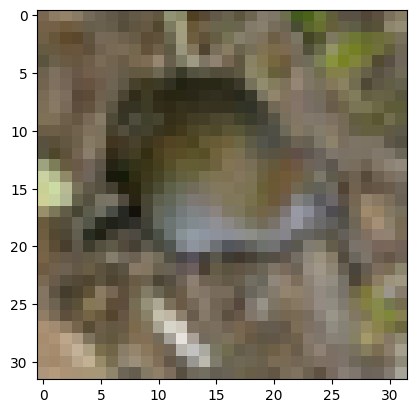

<Figure size 640x480 with 0 Axes>

In [172]:
image_index = 1200
plt.imshow(X_train[image_index].squeeze())
plt.figure()
plt.imshow(X_train_norm[image_index].squeeze())
plt.figure()

print(class_dict[np.argmax(y_train[image_index])])

In [173]:
X_train_norm.shape

(40000, 32, 32, 3)

In [174]:
X_train_norm[0].shape

(32, 32, 3)

In [180]:
y_train

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [177]:
y_validation.shape

(10000, 10)

# STEP #5: TRAIN THE MODEL

In [196]:
from tensorflow.keras import datasets, layers, models

cnn = models.Sequential()

cnn.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (32,32,3)))
cnn.add(layers.Conv2D(32, (3,3), activation = 'relu'))
cnn.add(layers.MaxPooling2D(2, 2))
cnn.add(tf.keras.layers.Dropout(rate=.2))

cnn.add(layers.Conv2D(64, (3,3), activation = 'relu'))
cnn.add(layers.Conv2D(64, (3,3), activation = 'relu'))
cnn.add(layers.MaxPooling2D(2, 2))
cnn.add(tf.keras.layers.Dropout(rate=.2))

cnn.add(layers.Flatten())

cnn.add(layers.Dense(1024, activation = 'relu'))
cnn.add(tf.keras.layers.Dropout(rate=.3))

cnn.add(layers.Dense(1024, activation = 'relu'))
cnn.add(tf.keras.layers.Dropout(rate=.3))

cnn.add(layers.Dense(10, activation = 'softmax'))
cnn.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 12, 12, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 10, 10, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1024)                │       1,639,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1024)                │       1,049,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │          10,250 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,764,842 (10.55 MB)

 Trainable params: 2,764,842 (10.55 MB)

 Non-trainable params: 0 (0.00 B)

In [197]:
cnn.compile(optimizer = tf.keras.optimizers.RMSprop(0.0002, decay = 1e-6), loss = 'categorical_crossentropy', metrics = ['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [198]:
history = cnn.fit(X_train_norm,
                 y_train,
                 batch_size = 256,
                 epochs = 50,
                 verbose = 1,
                 validation_data = (X_validation_norm, y_validation))

Epoch 1/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - accuracy: 0.1844 - loss: 2.1670 - val_accuracy: 0.3435 - val_loss: 1.8463
Epoch 2/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.3342 - loss: 1.8362 - val_accuracy: 0.3904 - val_loss: 1.6839
Epoch 3/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.3905 - loss: 1.6820 - val_accuracy: 0.4413 - val_loss: 1.5419
Epoch 4/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.4330 - loss: 1.5600 - val_accuracy: 0.4713 - val_loss: 1.4400
Epoch 5/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.4639 - loss: 1.4743 - val_accuracy: 0.4582 - val_loss: 1.4933
Epoch 6/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.4902 - loss: 1.4205 - val_accuracy: 0.5328 - val_loss: 1.3105
Epoch 7/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.5180 - loss: 1.3473 - val_accuracy: 0.5335 - val_loss: 1.3141
Epoch 8/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.5446 - loss: 1.2853 - val_acc

# STEP #6: EVALUATE THE MODEL

In [199]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

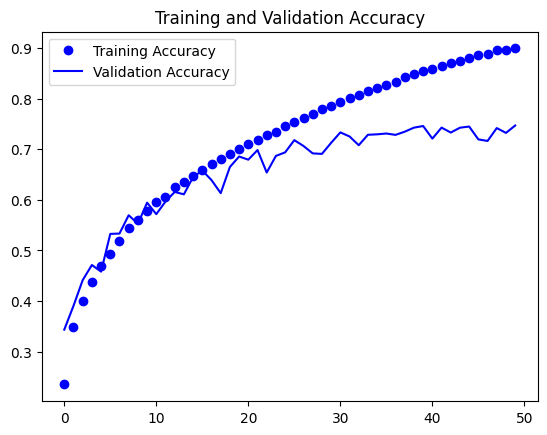

In [200]:
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

In [201]:
score = cnn.evaluate(X_test_norm, y_test)
print('Test Accuracy: {}'.format(score[1]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7484 - loss: 0.8639
Test Accuracy: 0.7470999956130981


In [202]:
predicted_classes = np.argmax(cnn.predict(X_test_norm), axis=1)
y_true = y_test
predicted_classes

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([3, 8, 8, ..., 5, 4, 7])

In [203]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

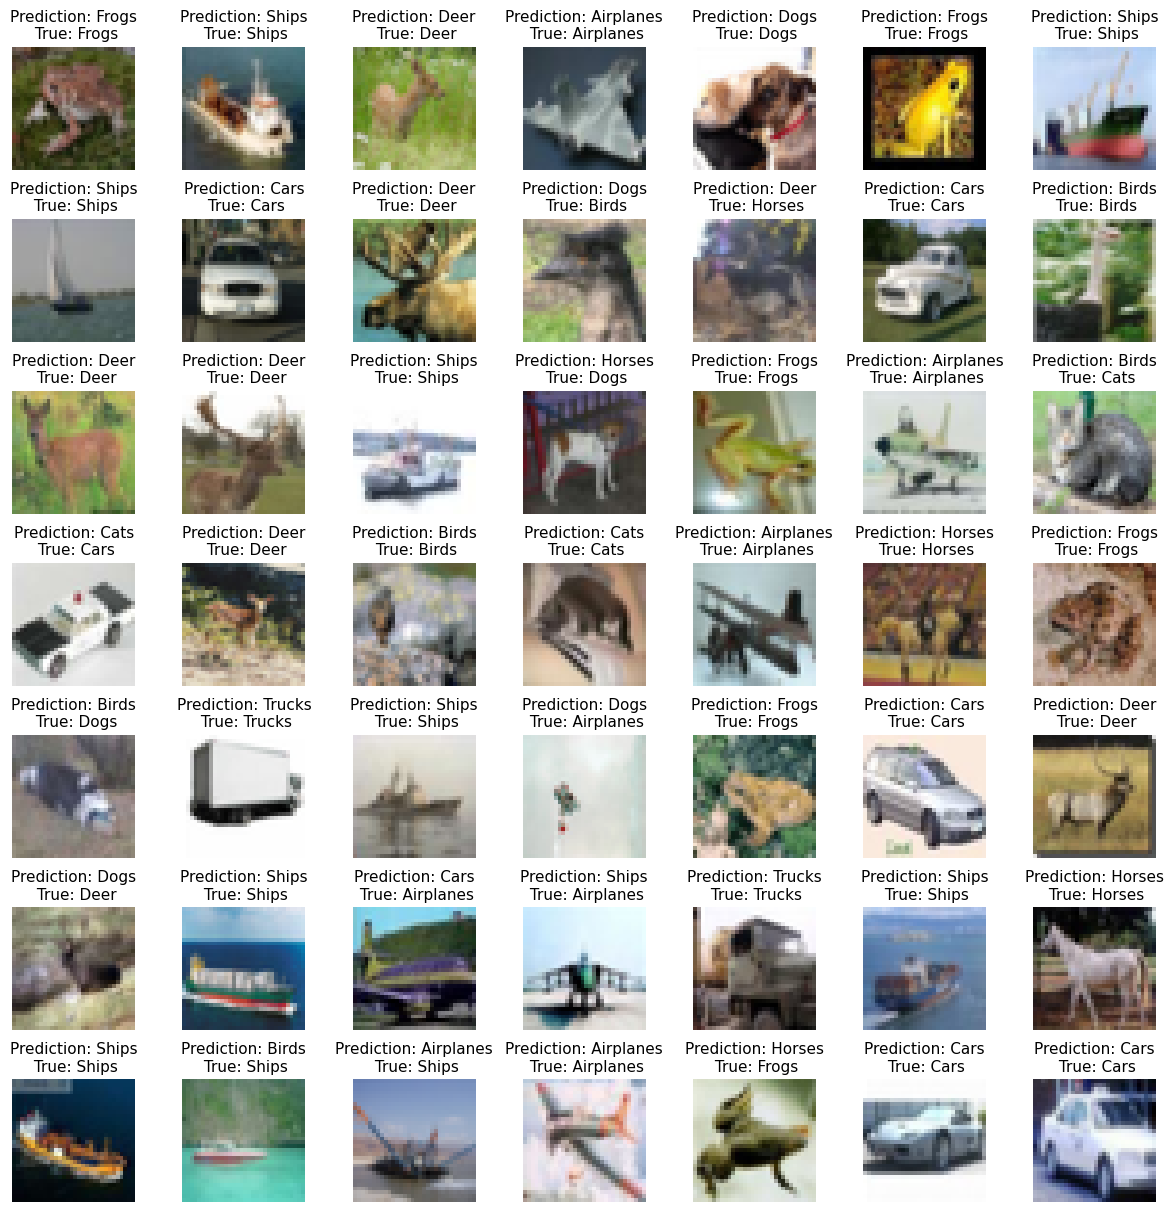

In [204]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid
W_grid = 7
L_grid = 7

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (15,15))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_training = X_test.shape[0] # get the length of the training dataset

for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables

    # Select a random number from 0 to n_training
    index = np.random.randint(0, n_training)
    # read and display an image with the selected index
    axes[i].imshow( X_test[index])
    axes[i].set_title(f"Prediction: {class_dict[predicted_classes[index]]}\n True: {class_dict[np.argmax(y_true[index])]}", fontsize = 11)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)


In [205]:
y_true = np.argmax(y_test, axis = 1)

<Axes: >

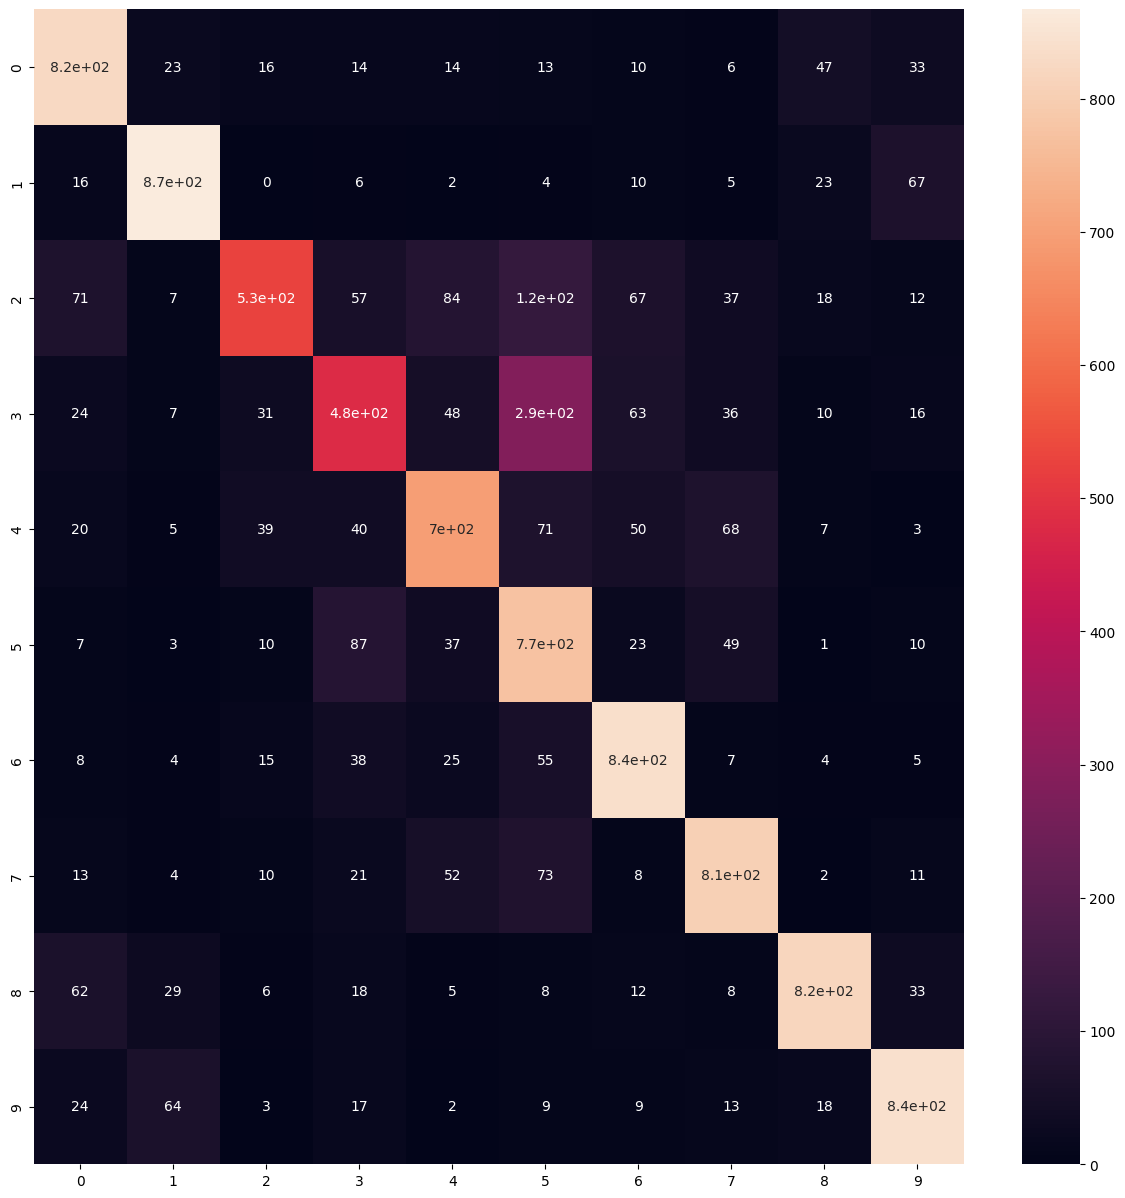

In [206]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (15, 15))
sns.heatmap(cm, annot = True)

# GREAT JOB!